# 04: Random Forest with SMOTE
We are dealing with a subset of our whole dataset, which means that we likely do not have enough data to broadly classify our dataset. We want to use some different resampling methods to explore how we might be able to better capture the general characteristics of our dataset.

We'll do this using a few different methods and evaluate the results of a Random Forest:
1. Cross-validation:
   1. To begin simply, we often just simply invoke a random split to divide our dataset into a training and test set. 
   2. Secondly, we can perform leave-one-out cross validation to take advantage of the wide range of data that we do have
   3. Lastly, we will invoke k-fold cross-validation where we will split our data into sizes of 1-1/k train and 1/k test set's over a distance and repeat this k-times
2. Bootstrapping
   1. Taking a subset of our data (with replacement), we can evaluate the performance of our model to quantify the range of uncertainty contained within it.

We have a challenge here since our data is not balanced i.e., we have more small storm events than we do big storm events, and these methods do not account for this imbalance. This may lead to some issues with misclassification in the minority classes. To comabat this, we can use some oversampling and undersampling techniques.

**Random Oversampling** - aims to balance the classes within the dataset by randomly increasing the minority class by replicating them. Another option is to use the *synthestic minority oversampling technique* (SMOTE) which synthesizes new minority instances between existing minority instances by randomly picking up the minority class and claculating the K-nearest neighbors for that point and these synthetic points are added between the neighbors and the chosen point. Another option is *cluster-based over sampling* which is a k-means clustering algorithm that applies to class instances as to identify the clusters in the dataset. These clusters are then oversampled so that clusters have the same size. 
**Undersampling** - aims to balance the balsses by eliminationg majority class examples. Can be done a few different ways, but one can be by removing two classes that are very close to one another.
**Class Weighting** - imbalanced classification can be modified by changing the "weight" that each class has when calculating the impurity score of a chosen split point, meaning that a split with a favor towards minority classes will be preferred. 

**Advantages of SMOTE (Synthetic Minority Over-sampling Technique):**

1. **Balancing Imbalanced Datasets:**
   - SMOTE is particularly useful for addressing imbalances in class distribution within datasets, where one or more classes are underrepresented.

2. **Enhancing Model Performance:**
   - By oversampling the minority class, SMOTE helps to improve the generalization performance of machine learning models, especially in situations where the minority class is important.

3. **Reducing Bias Towards Majority Class:**
   - Imbalanced datasets can lead machine learning models to be biased towards the majority class. SMOTE mitigates this bias by generating synthetic samples for the minority class, making the model more sensitive to minority class patterns.

4. **Preserving Information:**
   - SMOTE introduces synthetic samples that are generated by interpolating existing minority class samples. This process helps preserve the information present in the minority class.

5. **Application to Various Algorithms:**
   - SMOTE is a versatile technique that can be applied to various machine learning algorithms, including decision trees, support vector machines, and k-nearest neighbors.

**Caveats and Considerations:**

1. **Risk of Overfitting:**
   - SMOTE can lead to overfitting, especially when the synthetic samples are generated excessively. It's important to monitor the model's performance on an independent validation set.

2. **Potential Noise Introduction:**
   - The synthetic samples introduced by SMOTE may carry noise, as they are generated based on existing minority class samples. This noise could impact the model's ability to generalize to unseen data.

3. **Impact on Computational Resources:**
   - Generating synthetic samples can increase the size of the dataset significantly, potentially leading to increased computational requirements and memory usage.

4. **Sensitive to Choice of k (Neighbors):**
   - The effectiveness of SMOTE can depend on the choice of the parameter k (number of neighbors). The impact of k on the performance should be evaluated, and different values should be experimented with.

5. **Not Always Applicable:**
   - SMOTE may not be suitable for all types of datasets or all types of minority class distributions. Its effectiveness can vary depending on the characteristics of the data.

6. **Data-Dependent Results:**
   - The performance of SMOTE is data-dependent, and its success may vary across different datasets. It's important to evaluate its impact on a case-by-case basis.

In summary, while SMOTE is a valuable tool for addressing imbalanced datasets, it is essential to carefully consider its application and potential drawbacks, and to experiment with different parameters and techniques based on the specific characteristics of the data at hand.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
features = pd.read_csv('../data/02_processed/era5_matched_ar_events.csv', index_col=0)
df = features.copy()
features.head()
print('The shape of our features is:', features.shape)

The shape of our features is: (53, 9)


In [3]:

features['event_start_time'] = pd.to_datetime(features['event_start_time']).dt.dayofyear
features.head()

,event_start_time,max_ivt,duration,area,max_prcp,centroid_lat_min,centroid_lat_max,validation_scale,snow_no_snow
1,307,939.812500,19,2933709.50,37.431418,37.516745,39.561999,1,0
2,309,904.690430,43,2101863.25,37.576498,36.974140,44.478376,2,0
3,325,1504.083984,13,3758570.50,75.277734,36.005787,37.594911,1,1
4,329,685.914795,19,3123314.50,75.277734,38.469532,41.099843,1,0
6,339,2071.340820,25,6741418.00,162.604144,22.585240,33.801482,1,0


In [128]:
# remove area, centroid lat max, max_prcp, snow_no_snow
data = features.drop(columns=['area', 'max_prcp','snow_no_snow'], axis=1)
# Separate features and target variable
X = data.drop('validation_scale', axis=1)
y = data['validation_scale']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [129]:
# Assuming X_train and y_train are your training data
smote = SMOTE(sampling_strategy={1: 80,
                                 2: 60,
                                 3: 40,
                                 4: 20}, k_neighbors=2, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [130]:
X_train_resampled

,event_start_time,max_ivt,duration,centroid_lat_min,centroid_lat_max
0,45,1493.776611,49,25.021694,29.142764
1,339,2071.340820,25,22.585240,33.801482
2,76,850.757080,31,32.803524,36.041936
3,36,1235.878906,19,33.532905,34.960857
4,362,810.740479,37,30.993385,36.251832
...,...,...,...,...,...
195,252,1768.892983,66,25.355287,41.971328
196,42,1306.681252,85,27.827659,34.637233
197,169,1573.514759,73,26.641160,39.531559
198,213,1745.475871,70,24.346599,38.489924


In [120]:
# split the data randomly into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X_train_resampled, y_train_resampled, test_size=0.25, random_state=42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (150, 5)
Training Labels Shape: (150,)
Testing Features Shape: (50, 5)
Testing Labels Shape: (50,)


In [121]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# define a parameter grid to search over
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400,]}

# Use stratifold k-fold cross valudation  to evaluate each combination
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perfrom grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(train_features, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [10, 50, 100, 200, 300, 400]},
             scoring='accuracy')

In [122]:
# Get the results
best_n_estimators = grid_search.best_params_['n_estimators']
print(f'Best number of estimators: {best_n_estimators}')

# If needed, you can access other information such as the best model
best_rf_model = grid_search.best_estimator_

Best number of estimators: 100


In [131]:
# use the forest's predict method on the test data
predictions = best_rf_model.predict(X_val)
# calculate the absolute errors
predictions

array([3, 1, 2, 3, 1, 3, 3, 3, 1, 3, 2, 2, 1, 1], dtype=int64)

In [132]:
# Accuracy
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_val, predictions)
print('Classification Report:')
print(class_report)

Accuracy: 0.7142857142857143
Confusion Matrix:
[[5 0 1 0]
 [0 3 2 0]
 [0 0 2 0]
 [0 0 1 0]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       1.00      0.60      0.75         5
           3       0.33      1.00      0.50         2
           4       0.00      0.00      0.00         1

    accuracy                           0.71        14
   macro avg       0.58      0.61      0.54        14
weighted avg       0.83      0.71      0.73        14



c:\Users\dlhogan\OneDrive - UW\Documents\GitHub\MLGeo-2023-Atmospheric-Rivers\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dlhogan\OneDrive - UW\Documents\GitHub\MLGeo-2023-Atmospheric-Rivers\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dlhogan\OneDrive - UW\Documents\GitHub\MLGeo-2023-Atmospheric-Rivers\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

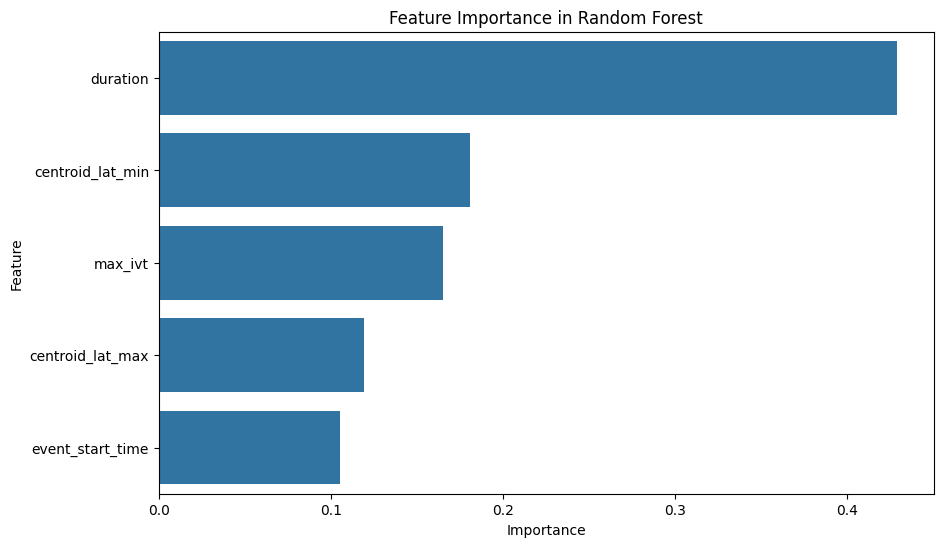

In [133]:
import seaborn as sns
# Assuming best_rf_model is your trained Random Forest model
feature_importance = best_rf_model.feature_importances_
feature_names = X_train_resampled.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

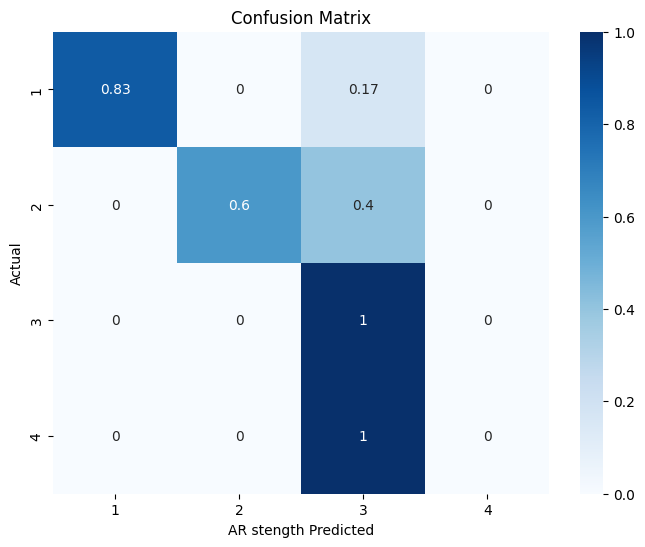

In [135]:
# Assuming y_val and y_pred are your validation set labels and predictions
cm = confusion_matrix(y_val, predictions, normalize='true')
class_labels = ['1', '2', '3', '4']
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('AR stength Predicted')
plt.ylabel('Actual')
plt.show()

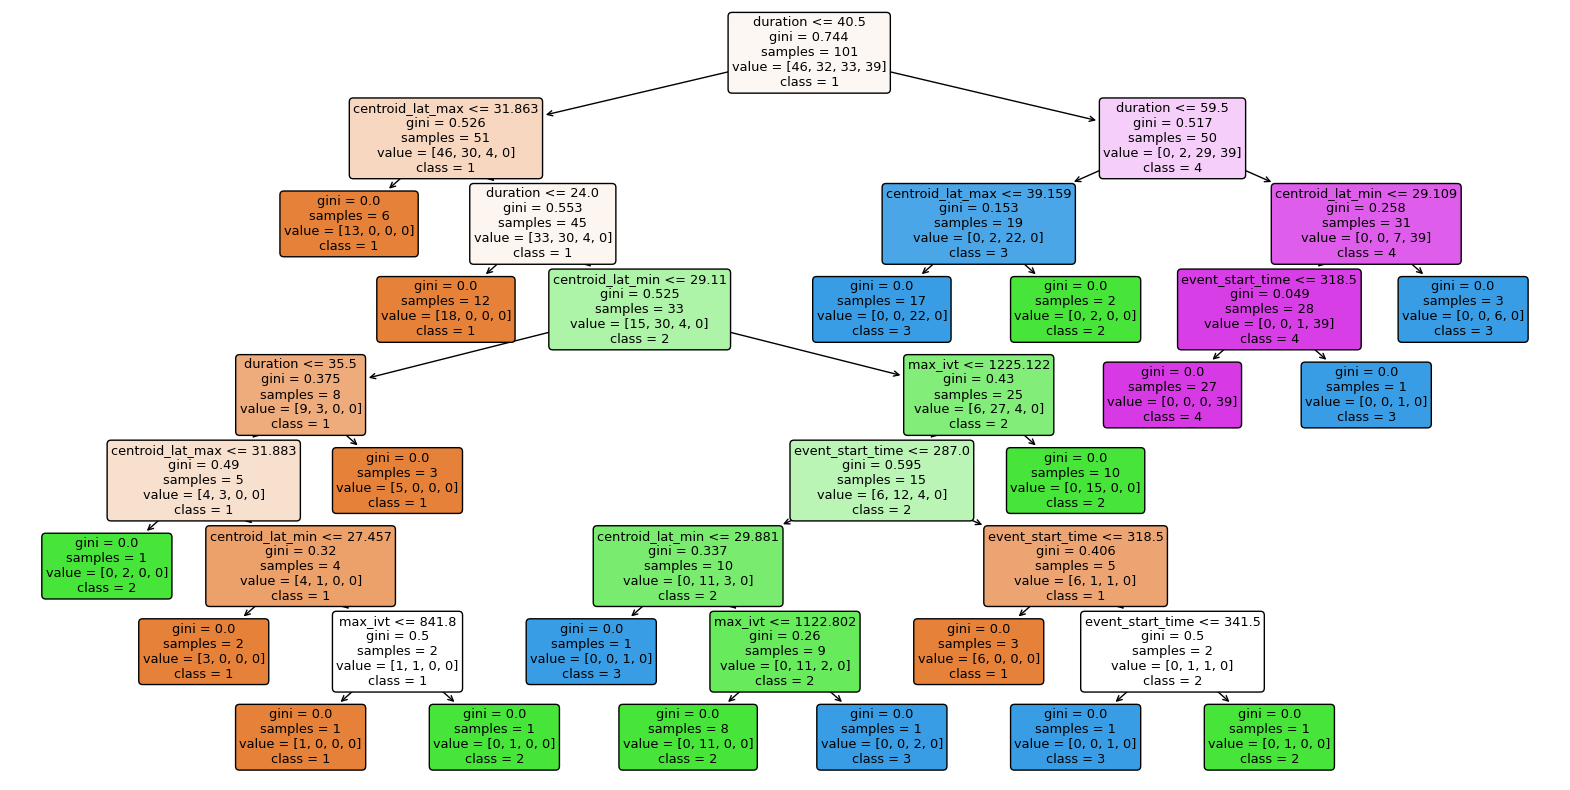

In [39]:
from sklearn.tree import plot_tree

# Assuming best_rf_model is your trained Random Forest model
plt.figure(figsize=(20, 10))
plot_tree(best_rf_model.estimators_[0], feature_names=feature_names, filled=True, rounded=True, class_names=class_labels)
plt.show()

### Repeat Random Forest for Binary Snow-No Snow situation

In [83]:
# remove area, centroid lat max, max_prcp, snow_no_snow
data = features.drop(columns=['area', 'max_prcp','validation_scale'], axis=1)
# Separate features and target variable
X = data.drop('snow_no_snow', axis=1)
y = data['snow_no_snow']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [98]:
# Assuming X_train and y_train are your training data
smote = SMOTE(sampling_strategy={0: 100,
                                 1: 100}, k_neighbors=3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [99]:
X_train_resampled

,event_start_time,max_ivt,duration,centroid_lat_min,centroid_lat_max
0,45,1493.776611,49,25.021694,29.142764
1,339,2071.340820,25,22.585240,33.801482
2,76,850.757080,31,32.803524,36.041936
3,36,1235.878906,19,33.532905,34.960857
4,362,810.740479,37,30.993385,36.251832
...,...,...,...,...,...
195,20,902.370160,19,35.892969,36.934270
196,16,723.127232,21,32.489430,34.130771
197,165,1485.191875,13,34.728527,36.307816
198,70,918.505249,31,28.266982,37.543773


In [100]:
# split the data randomly into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X_train_resampled, y_train_resampled, test_size=0.25, random_state=42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (150, 5)
Training Labels Shape: (150,)
Testing Features Shape: (50, 5)
Testing Labels Shape: (50,)


In [101]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# define a parameter grid to search over
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400,]}

# Use stratified k-fold cross valudation  to evaluate each combination
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# perfrom grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(train_features, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [10, 50, 100, 200, 300, 400]},
             scoring='accuracy')

In [102]:
# Get the results
best_n_estimators = grid_search.best_params_['n_estimators']
print(f'Best number of estimators: {best_n_estimators}')

# If needed, you can access other information such as the best model
best_rf_model = grid_search.best_estimator_

Best number of estimators: 100


In [103]:
# use the forest's predict method on the test data
predictions = best_rf_model.predict(test_features)
# calculate the absolute errors
predictions

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0], dtype=int64)

In [104]:
# Accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(test_labels, predictions)
print('Classification Report:')
print(class_report)

Accuracy: 0.96
Confusion Matrix:
[[25  0]
 [ 2 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.92      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



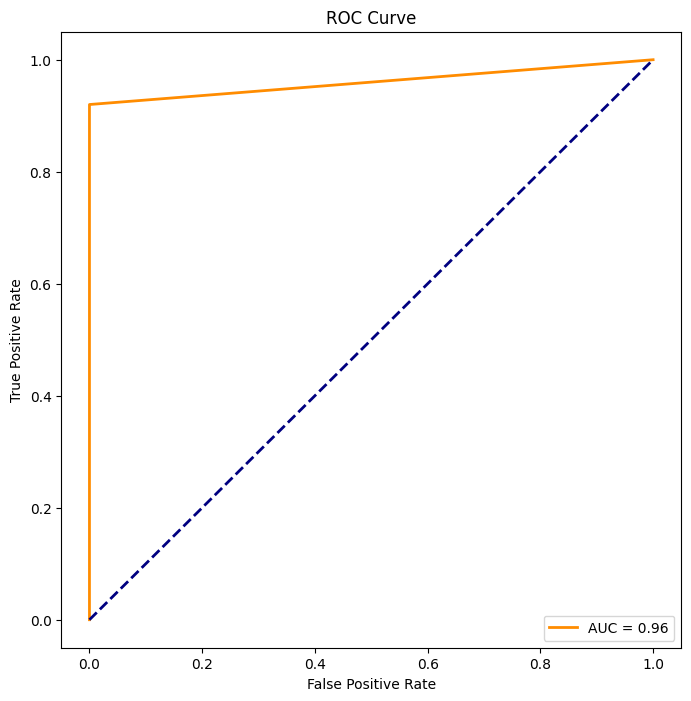

In [105]:
from sklearn.metrics import roc_curve, auc

# Assuming y_val and y_pred_proba are your validation set labels and predicted probabilities
fpr, tpr, _ = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

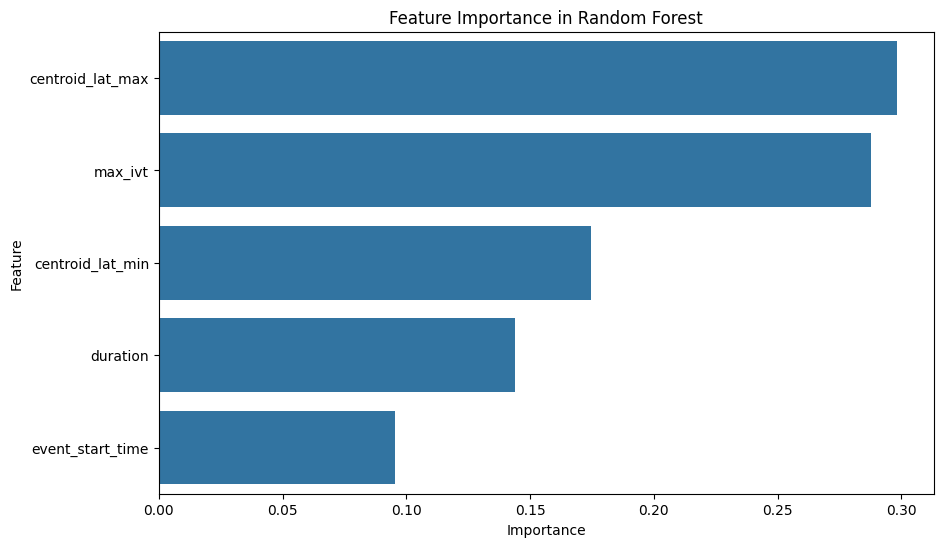

In [106]:
import seaborn as sns
# Assuming best_rf_model is your trained Random Forest model
feature_importance = best_rf_model.feature_importances_

feature_names = X_train_resampled.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

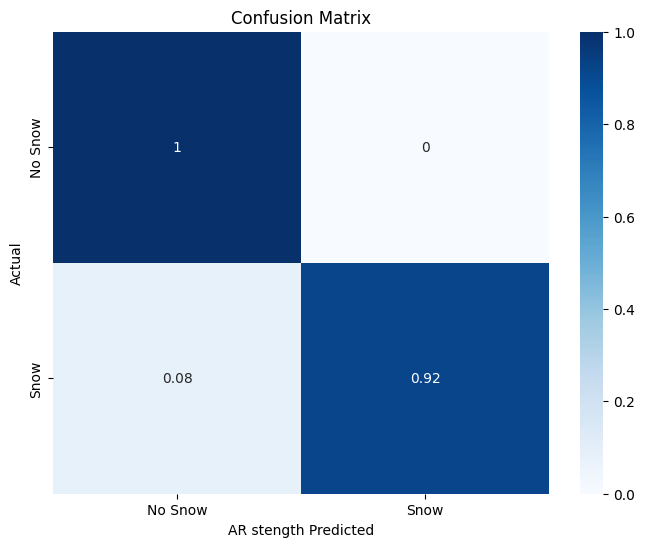

In [107]:
# Assuming y_val and y_pred are your validation set labels and predictions
cm = confusion_matrix(test_labels, predictions, normalize='true')
class_labels = ['No Snow', 'Snow']
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('AR stength Predicted')
plt.ylabel('Actual')
plt.show()

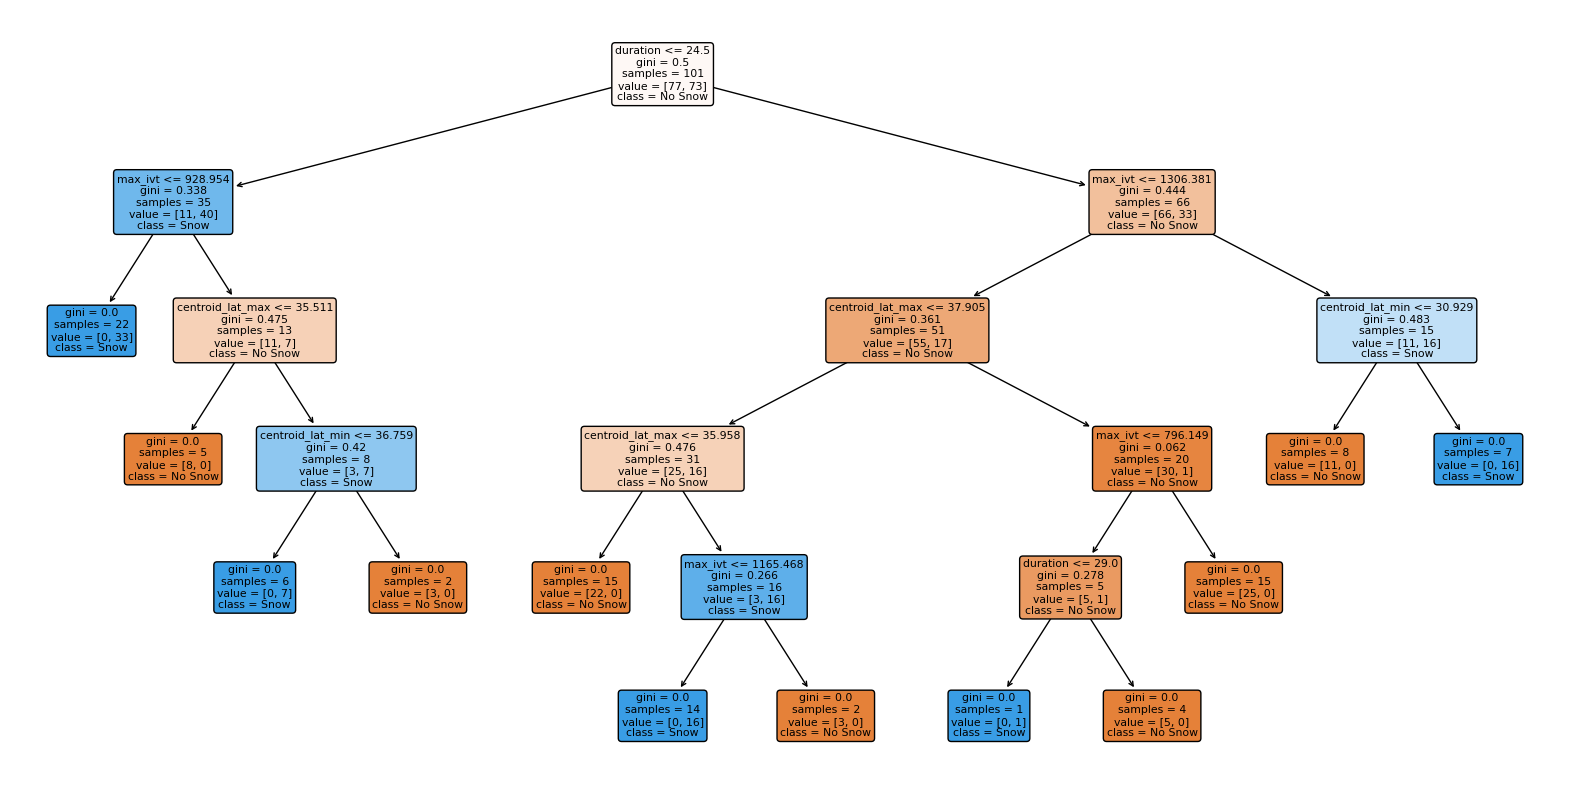

In [58]:
from sklearn.tree import plot_tree

# Assuming best_rf_model is your trained Random Forest model
plt.figure(figsize=(20, 10))
plot_tree(best_rf_model.estimators_[0], feature_names=feature_names, filled=True, rounded=True, class_names=class_labels)
plt.show()